In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

In [18]:
r=pd.read_csv('coursera_reviews_processed.csv')
r.head()

,reviews,reviewers,date_reviews,rating,course_id,processed_reviews
0,I struggled with some of the instruction as I ...,By Janny v R J,"Apr 01, 2016",3.0,python,struggl instruct get exercis quiz work right e...
1,Sir is an amazing teacher and expresses his id...,By Aman V,"Apr 01, 2016",4.0,python,sir amaz teacher express idea clear
2,"I recommend widely this course, it reaches ver...",By Angélica S,"Apr 01, 2016",5.0,food-and-health,recommend wide cours reach import inform weste...
3,"If you no nothing about this topic, lectures a...",By Jolana L,"Apr 01, 2016",5.0,food-and-health,noth topic lectur good
4,Highly recommended course!,By Narine A,"Apr 01, 2016",5.0,food-and-health,high recommend cours


In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stellayin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [21]:
neg=[]
neu=[]
pos=[]
comp=[]
for review in r.reviews:
    scores=sentiment_analyzer_scores(str(review))
    neg.append(scores['neg'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    comp.append(scores['compound'])

In [22]:
r['s_pos']=pos
r['s_neu']=neu
r['s_neg']=neg
r['s_comp']=comp

In [23]:
r.head()

,reviews,reviewers,date_reviews,rating,course_id,processed_reviews,s_pos,s_neu,s_neg,s_comp
0,I struggled with some of the instruction as I ...,By Janny v R J,"Apr 01, 2016",3.0,python,struggl instruct get exercis quiz work right e...,0.000,0.912,0.088,-0.3400
1,Sir is an amazing teacher and expresses his id...,By Aman V,"Apr 01, 2016",4.0,python,sir amaz teacher express idea clear,0.430,0.570,0.000,0.7778
2,"I recommend widely this course, it reaches ver...",By Angélica S,"Apr 01, 2016",5.0,food-and-health,recommend wide cours reach import inform weste...,0.232,0.768,0.000,0.8883
3,"If you no nothing about this topic, lectures a...",By Jolana L,"Apr 01, 2016",5.0,food-and-health,noth topic lectur good,0.222,0.625,0.153,0.2484
4,Highly recommended course!,By Narine A,"Apr 01, 2016",5.0,food-and-health,high recommend cours,0.544,0.456,0.000,0.3367


In [24]:
r.to_csv('sentiment analysis result.csv',index=False)

In [25]:
for i in range(6,11):
    print ("----------------------------------------")
    print("Review : ",r['reviews'][i])
    print("Positivity:",r['s_pos'][i])
    print("Negativity:",r['s_neg'][i])
    print ("----------------------------------------")

----------------------------------------
Review :  Wonderful course. thoroughly informative and  the discussions page really helped me to overcome several annoying small problems 
Positivity: 0.16
Negativity: 0.234
----------------------------------------
----------------------------------------
Review :  Boring techniques for remembering. Nothing related to learning or understanding.
Positivity: 0.0
Negativity: 0.204
----------------------------------------
----------------------------------------
Review :  This course is a brilliant, succinct and scientific illustration of the proverb- " the learning period for human is actually from cradle to grave"!!!!! I have just completed this amazing course and I highly recommend this course to each and every human being who is willing to learn!!!!!! The most wonderful thing about this course is it makes you confident of the learning journey by familiarizing you with the hiccups of the journey and also the necessary ammunition to overcome those

/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/1222040956.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Positive Reviews')

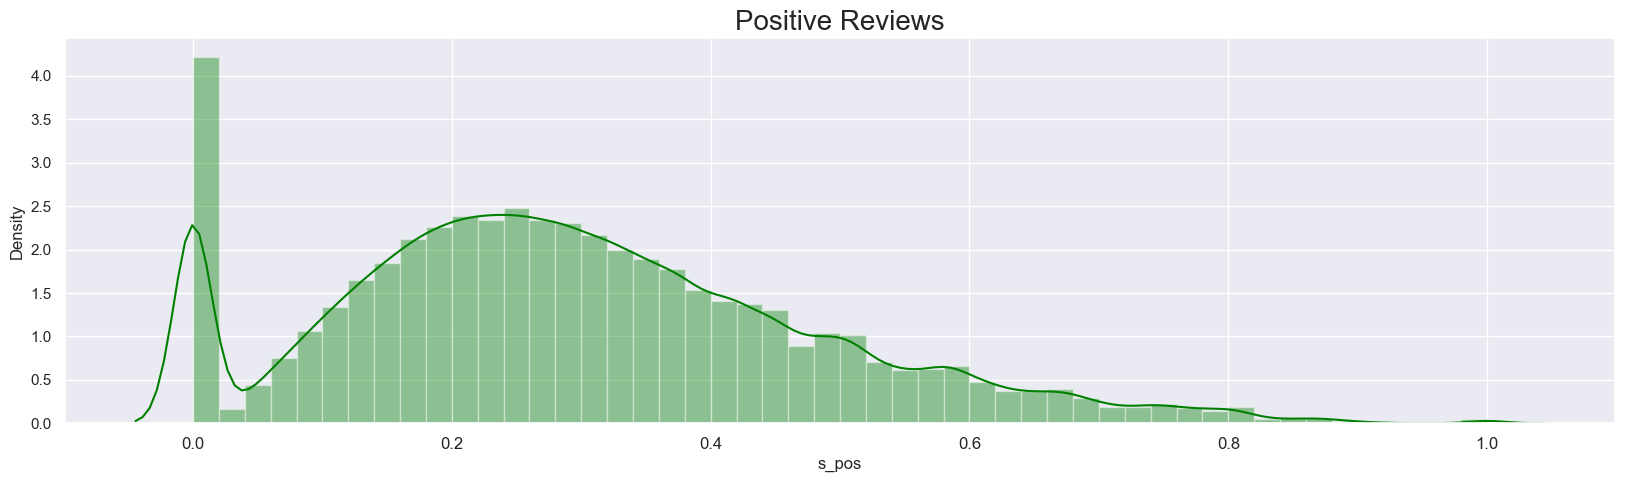

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_pos'],color='green')
p.axes.set_title("Positive Reviews",fontsize=20)

/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/353002832.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Negative Reviews')

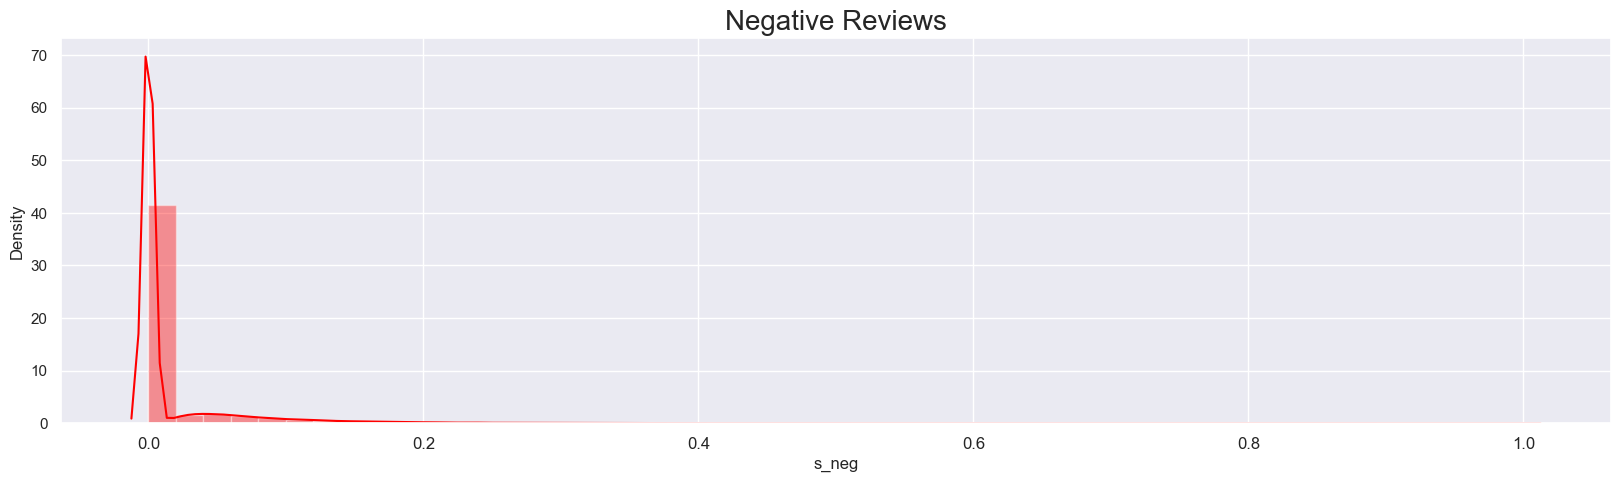

In [10]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neg'],color='red')
p.axes.set_title("Negative Reviews",fontsize=20)

/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/2059159569.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Neutral Reviews')

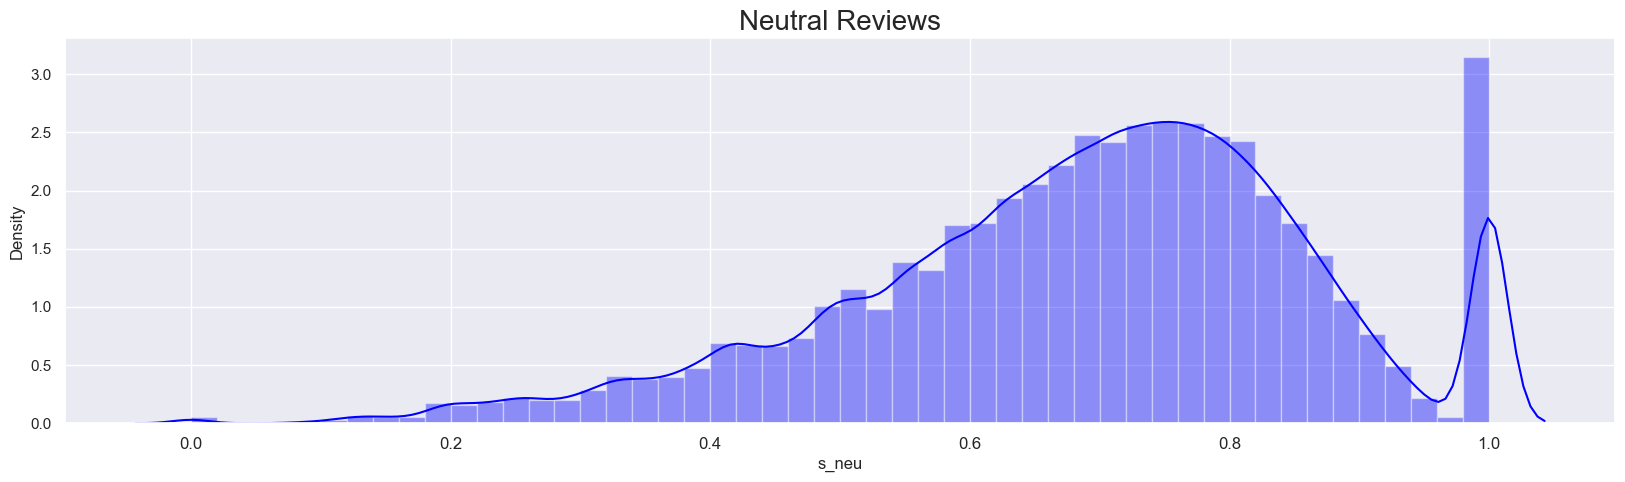

In [11]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neu'],color='blue')
p.axes.set_title("Neutral Reviews",fontsize=20)

/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/3676465920.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'All Reviews')

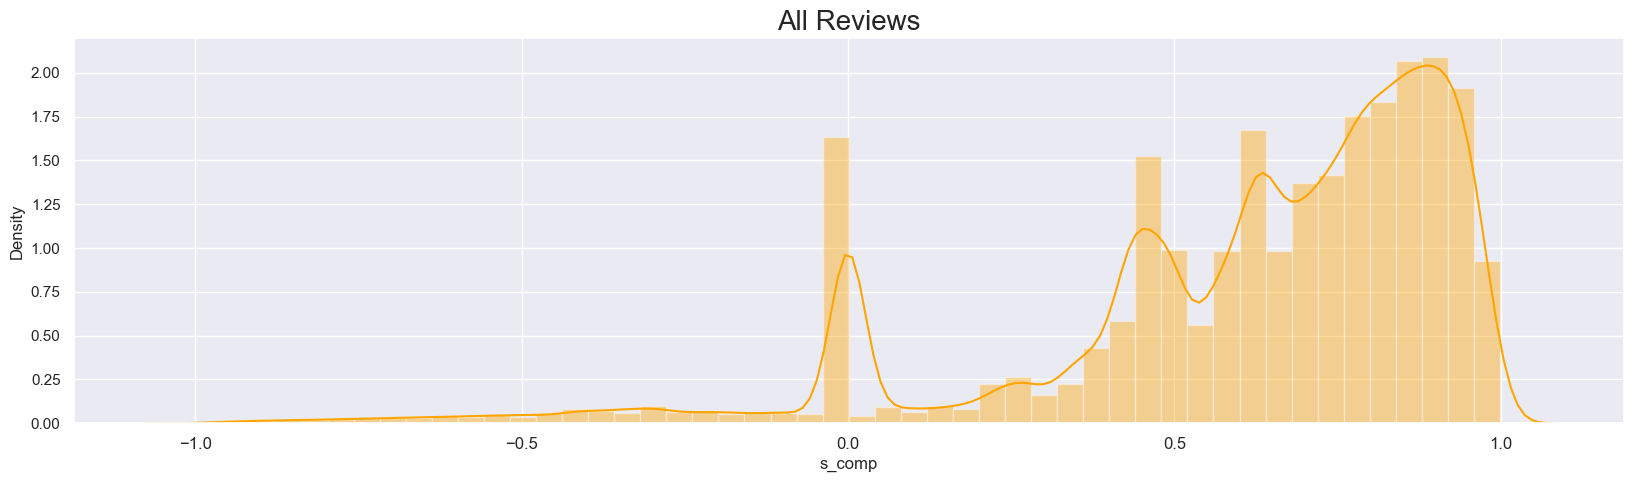

In [12]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_comp'],color='orange')
p.axes.set_title("All Reviews",fontsize=20)

In [13]:
course_wise = r.groupby('course_id')['s_comp','rating'].mean()

/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/2693532262.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [14]:
course_wise['s_comp']=((course_wise['s_comp']*10)+10)/4
course_wise

,s_comp,rating
course_id,,
access-control-sscp,3.537683,4.233333
addiction-and-the-brain,3.940923,4.518732
addiction-treatment,3.994262,4.903846
advanced-valuation-and-strategy,3.985054,4.527607
agile-atlassian-jira,4.015512,4.645724
...,...,...
what-is-social,3.996151,4.552139
wind-energy,4.054547,4.681243
wine,3.865984,4.397436


/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/2380556374.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/s7/jww5b2_54t3g5l2frx0f_6480000gn/T/ipykernel_55010/2380556374.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Course wise Actual and Sentiment Scores')

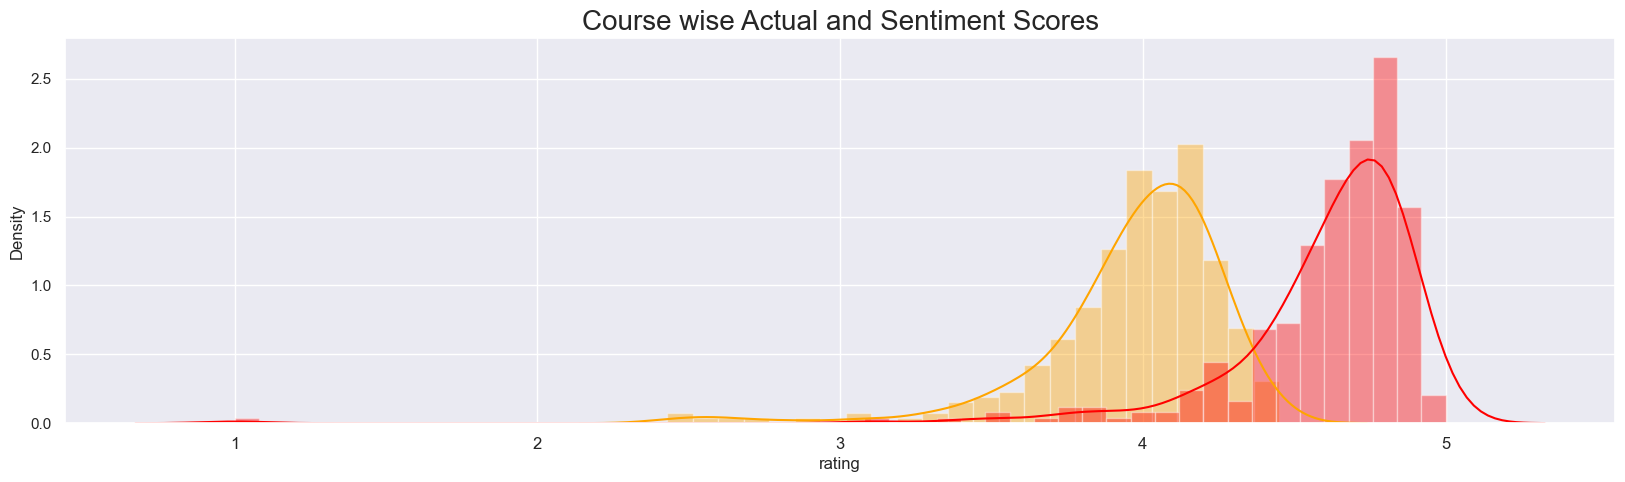

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(course_wise['s_comp'],color='orange')
p=sns.distplot(course_wise['rating'],color='red')
p.axes.set_title("Course wise Actual and Sentiment Scores",fontsize=20)

Co-relation

Text(0.5, 1.0, 'The relation between rating score and sentiment score')

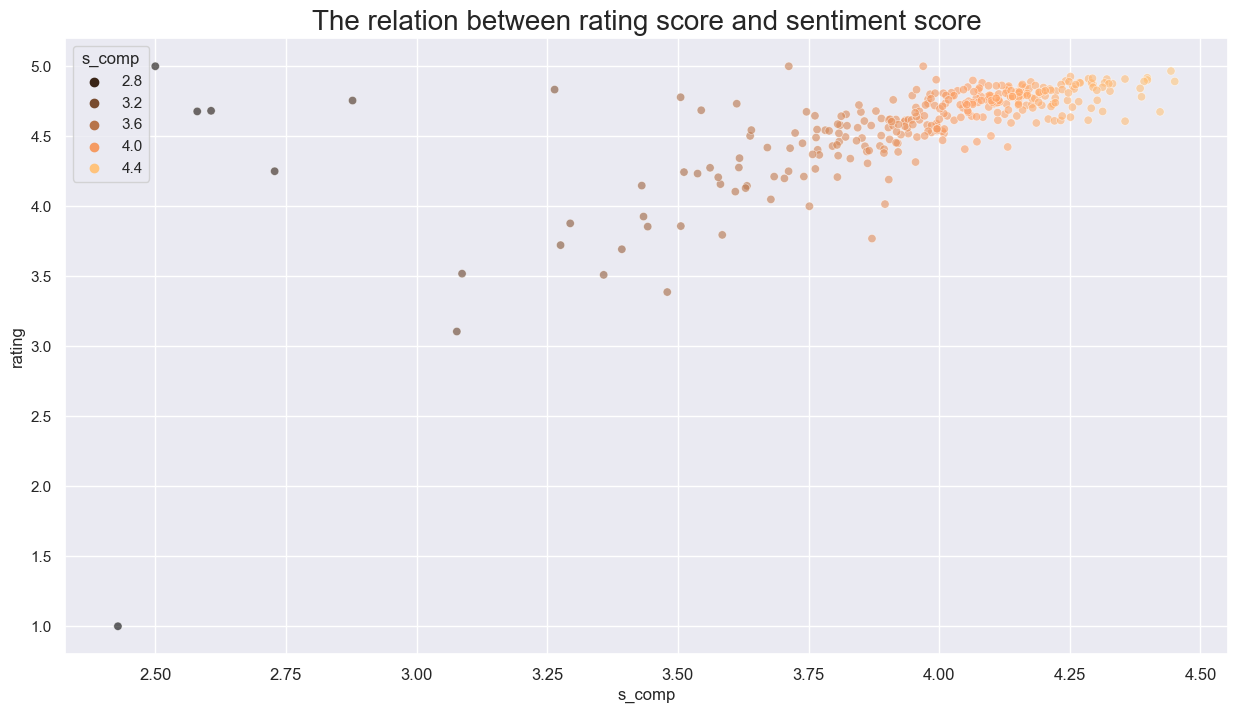

In [30]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(fontsize=12)
p=sns.scatterplot(data=course_wise,x='s_comp',y='rating',palette='copper',hue='s_comp',alpha=0.6)
p.axes.set_title("The relation between rating score and sentiment score",fontsize=20)